<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

# Homework 9

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

### 1. Peter Meets Paul ###
Peter and Paul agree to meet at a restaurant at noon. Peter arrives at time normally distributed with mean 12:00 noon and SD 5 minutes. Paul arrives at a time normally distributed with mean 12:02 P.M. and SD 3 minutes. 

Find the chances below assuming that the two arrival times are independent. First, write a formula for the chance in terms of the standard normal cdf $\Phi$. Then use a code cell to find the numerical value. You do not have to turn in any coding work for this question.


**a)** $P(\text{Peter arrives before Paul})$


**b)** $P(\text{both men arrive within 3 minutes of noon})$

**c)** $P(\text{the two men arrive within 3 minutes of each other})$


In [3]:
# Calculation for 1a
mu = 2 - 0
var = 5**2 + 3**2
sigma = var**0.5
1 - stats.norm.cdf(0, mu, sigma)

0.6341997055200493

In [4]:
# Calculation for 1b
# P(-3<peter<3)*p(-3<paul<3)
(stats.norm.cdf(3, 0, 5) - stats.norm.cdf(-3, 0, 5)) * (stats.norm.cdf(3, 2, 3) - stats.norm.cdf(-3, 2, 3))

0.2631162570048904

In [5]:
# Calculation for 1c
#P(|peter - paul| < 3)
stats.norm.cdf(3, mu, sigma) - stats.norm.cdf(-3, mu, sigma) 

0.37249786716756705

### 2. Slices of a Normal Cake ###
Let $X$ and $Y$ be independent standard normal random variables.

**a)** Find $P(X > 0, Y > 0)$. 

Yes, it's easy. But get a piece of paper and draw the event on the plane anyway. Imagine the joint density surface over the plane, and try to imagine the relevant volume under the joint density surface as a quadrant-shaped slice of a bell-shaped cake.

**b)** Find $P(X > 0, Y > X)$.

**c)** Find $P(X > 0, Y > \sqrt{3}X)$.

### 3.  Distance Between Two Normal Points ###
Suppose two shots are fired at a target. Assume each shot hits with independent normally distributed coordinates, with the same means and equal unit variances. Let $D$ be the distance between the point where the two shots strike.

**a)** Find $E(D)$. Your calculation will go faster if you remember that a normal $(0, \sigma^2)$ variable can be written as $\sigma Z$ where $Z$ is standard normal.

**b)** Find $Var(D)$.

### 4. Min and Max of IID Uniforms ###
Let $U_1, U_2, \ldots, U_n$ be i.i.d. uniform on $(0, 1)$. Let $U_{(1)}$ and $U_{(n)}$ be the minimum and maximum of $U_1, U_2, \ldots, U_n$.

**a)** Find the joint density of $U_{(1)}$ and $U_{(n)}$.

**b)** Find the density of $U_{(1)}$.

**c)** Fix $x \in (0, 1)$ and find the conditional density of $U_{(n)}$ given $U_{(1)} = x$.

**d)** For fixed $x \in (0, 1)$, let $X_1, X_2, \ldots, X_{n-1}$ be $n-1$ i.i.d. uniform $(x, 1)$ random variables. Find the density of $M = \max\{X_1, X_2, \ldots, X_{n-1}\}$ and compare it to your answer to Part **c**.

**e)** The random variable $R_n = U_{(n)} - U_{(1)}$ is called the *range* of the sample $U_1, U_2, \ldots, U_n$. Find $E(R_n)$.

### 5. Poisson MGF ###
Let $X$ have Poisson($\mu$) distribution, and let $Y$ independent of $X$ have Poisson $(\lambda)$ distribution.

**a)** Find the mgf of $X$.

**b)** Use the result of (a) to show that the distribution of $X+Y$ is Poisson.

### 6. Gamma Tail Bound ###
Let $X$ have the gamma $(r, \lambda)$ distribution. 

**a)** Show that $P(X \ge 2E(X)) \le (2/e)^r$.

[Remember that if $h$ is a positive function of $x$, then the value of $x$ that minimizes $h$ is the same as the value of $x$ that minimizes $\log(h)$.]

**b) [CODE]** Fix $\lambda = 1$. Display overlaid plots of the following three graphs as functions of $r$, for $r$ in the interval (0.5, 15)$ :

- $P(X \ge 2E(X))$
- $(2/e)^r$
- Markov's bound on $P(X \ge 2E(X))$

The code uses `plt.plot` which is also used in Lab 9. The expression `stats.gamma.cdf(x, r, scale=1)` evaluates to the cdf of the gamma $(r, 1)$ distribution at the point $x$.

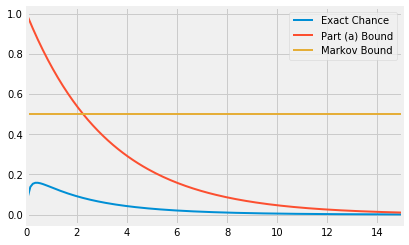

In [7]:
# Answer to 6b
r = np.arange(0.05, 15, 0.1) 

markov_bound = r / (2*r)

part_a_bound = (2/np.e)**(r)

exact = stats.gamma.cdf(2*r, r, scale=1)
exact = 1 - exact

plt.plot(r, exact, lw=2, label='Exact Chance')
plt.plot(r, part_a_bound, lw=2, label='Part (a) Bound')
plt.plot(r, markov_bound, lw=2, label='Markov Bound')
plt.legend()
plt.xlim(0, 15);

**c)** For which values of $r$ is the bound in part (a) better than Markov's bound? Show the analytical calculation. Then use a code cell to find the numerical range and confirm that it is consistent with the graphs in (b).

In [9]:
# Calculation for 6c
# the r value is consistent with graph in (b)
r = np.log(1/2) / np.log(2/np.e)
r

2.2588913532709296

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* **Save your notebook using File > Save and Checkpoint.**
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework 9 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [ ]:
import gsExport
gsExport.generateSubmission("Homework_09.ipynb")